## 타이타닉 데이터를 활용한 데이터 분석

## 0. 라이브러리 및 데이터
## Library & Data

In [ ]:
import pandas as pd #판다스 패키지 불러오기

: 

### pd.read_csv()
 - csv파일 읽는 함수

In [2]:
# 데이터 불러오기
train = pd.read_csv("./타이타닉/train.csv")  # 모델 학습 파일
test = pd.read_csv("./타이타닉/test.csv")    # 모델 시험지 파일
submission = pd.read_csv("./타이타닉/submission.csv")    # 답안지 파일

---

## 1. Data Spread (기술통계영역)

### 1) 데이터 확인

- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0: 사망, 1: 생존)
- Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실번호
- Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

### a. 많은 데이터 중 맨 위 몇개, 맨 마지막 몇개 즉 몇개만 확인해보기
pd.DataFrame.head()
 - 데이터 프레임의 위에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [3]:
train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


pd.DataFrame.tail()
 - 데이터 프레임의 아래에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [4]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### b. 데이터프레임의 행,열 개수 확인
pd.DataFrame.shape
 - 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [7]:
train.shape

(891, 12)

In [8]:
test.shape

(418, 11)

In [9]:
submission.shape

(418, 2)

### c. 데이터프레임의 column별 정보를 확인
pd.DataFrame.info()
- 데이터셋의 column별 정보를 알려주는 함수
- 비어 있지 않은 값은 (non-null)은 몇개인지?
- column의 type은 무엇인지?
 - type의 종류 : int(정수), float(실수), object(문자열), 등등 (date, ...)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 2. 숫자형 (int, float) column들의 기술 통계량 확인
pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 
 
 
 
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
   - 아래쪽 울타리: $Q_1$ - $1.5 * IQR$
   - 위쪽 울타리: $Q_3$ + $1.5 * IQR$
   - $IQR$ = $Q_3 - Q_1$
 
 
<img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="700" height="700">

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3. 그럼 숫자형이 아닌 column들은 무얼 확인합니까
1) pd.Series.value_counts()
 - series 내 고유값들 각각의 개수를 보여주는 함수
 - 가장 많이 나오는 고유값들 순서로 보여줍니다.
 - 비어 있는 값은 고려하지 않습니다.

In [13]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

2. pd.Series.unique()
- 해당 series의 고유값들만 보여주는 함수
- [1, 1, 1, 3] 이라는 시리즈가 있다면, unique() 함수 적용시 [1, 3]이 출력됩니다.
- nan 값이 있을시 nan값도 포함하여 출력한다 (Not a Number)
- 출현하는 순서대로 나오기 때문에, 알파벳 순서 또는 오름차순으로 정렬되어 있지 않습니다.

In [15]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

3. pd.DataFrame.groupby()
 - 집단에 대한 통계량 확인 
 
<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Split+Apply+Combine+Strategy.png" width="700" height="500">

In [17]:
%%time
train[['Pclass', 'Fare']].groupby('Pclass').mean()

Wall time: 14 ms


,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [18]:
%%time
train.groupby('Pclass').mean()

Wall time: 5.99 ms


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


### 4. 시각화 해봅시다
1. pd.Series.plot(kind = "bar")
- 막대 그래프
- index 값이 x축, value값이 y축으로 대응 됩니다. 
- value_counts()의 결과물을 보여줄 때 유용합니다. 
- groupby된 결과물을 보여줄 때 유용합니다. 

<AxesSubplot:xlabel='Pclass'>

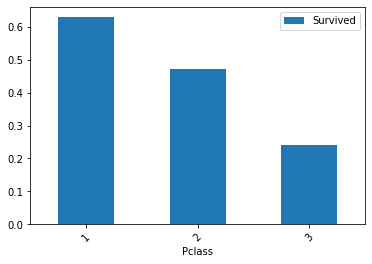

In [19]:
train[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind = "bar", rot = 45)

2. pd.Series.plot(kind = 'hist')
- 히스토그램: 구간별로 속해있는 row의 개수를 시각화 합니다.
- 수치형에서만 가능, 범주는 안됩니다!
- 보조선은 grid = True를 통해 추가 할 수 있습니다. 

<img src="http://www.statisticslectures.com/images/continuoushistogram.gif" width="700" height="300">

<AxesSubplot:ylabel='Frequency'>

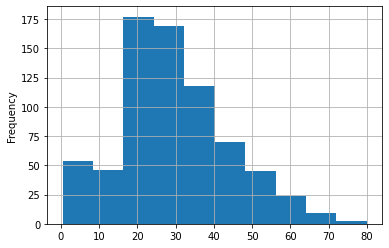

In [19]:
train['Age'].plot(kind = 'hist', bins = 10, grid = True)

3. pd.DataFrame.plot(x, y, kind = 'scatter')
- 산점도: 두 변수간의 관계를 시각화

<AxesSubplot:xlabel='Age', ylabel='Survived'>

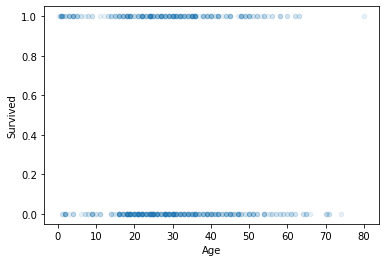

In [20]:
train.plot('Age', 'Survived', kind = 'scatter', alpha = 0.1)

4. pd.DataFrame.boxplot()
- boxplot : 사분위 지점을 빠르게 파악할 수 있고 이상치가 어느정도인지 빠르게 판단 할 수 있다

<AxesSubplot:>

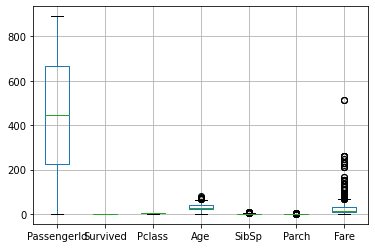

In [21]:
train.boxplot()

In [20]:
train_num = train[['Pclass','Age','SibSp','Parch','Fare']]
train_num

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [21]:
# 이상치 확인을 위한 boxplot 그리기 전 초기작업
import seaborn as sns #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib

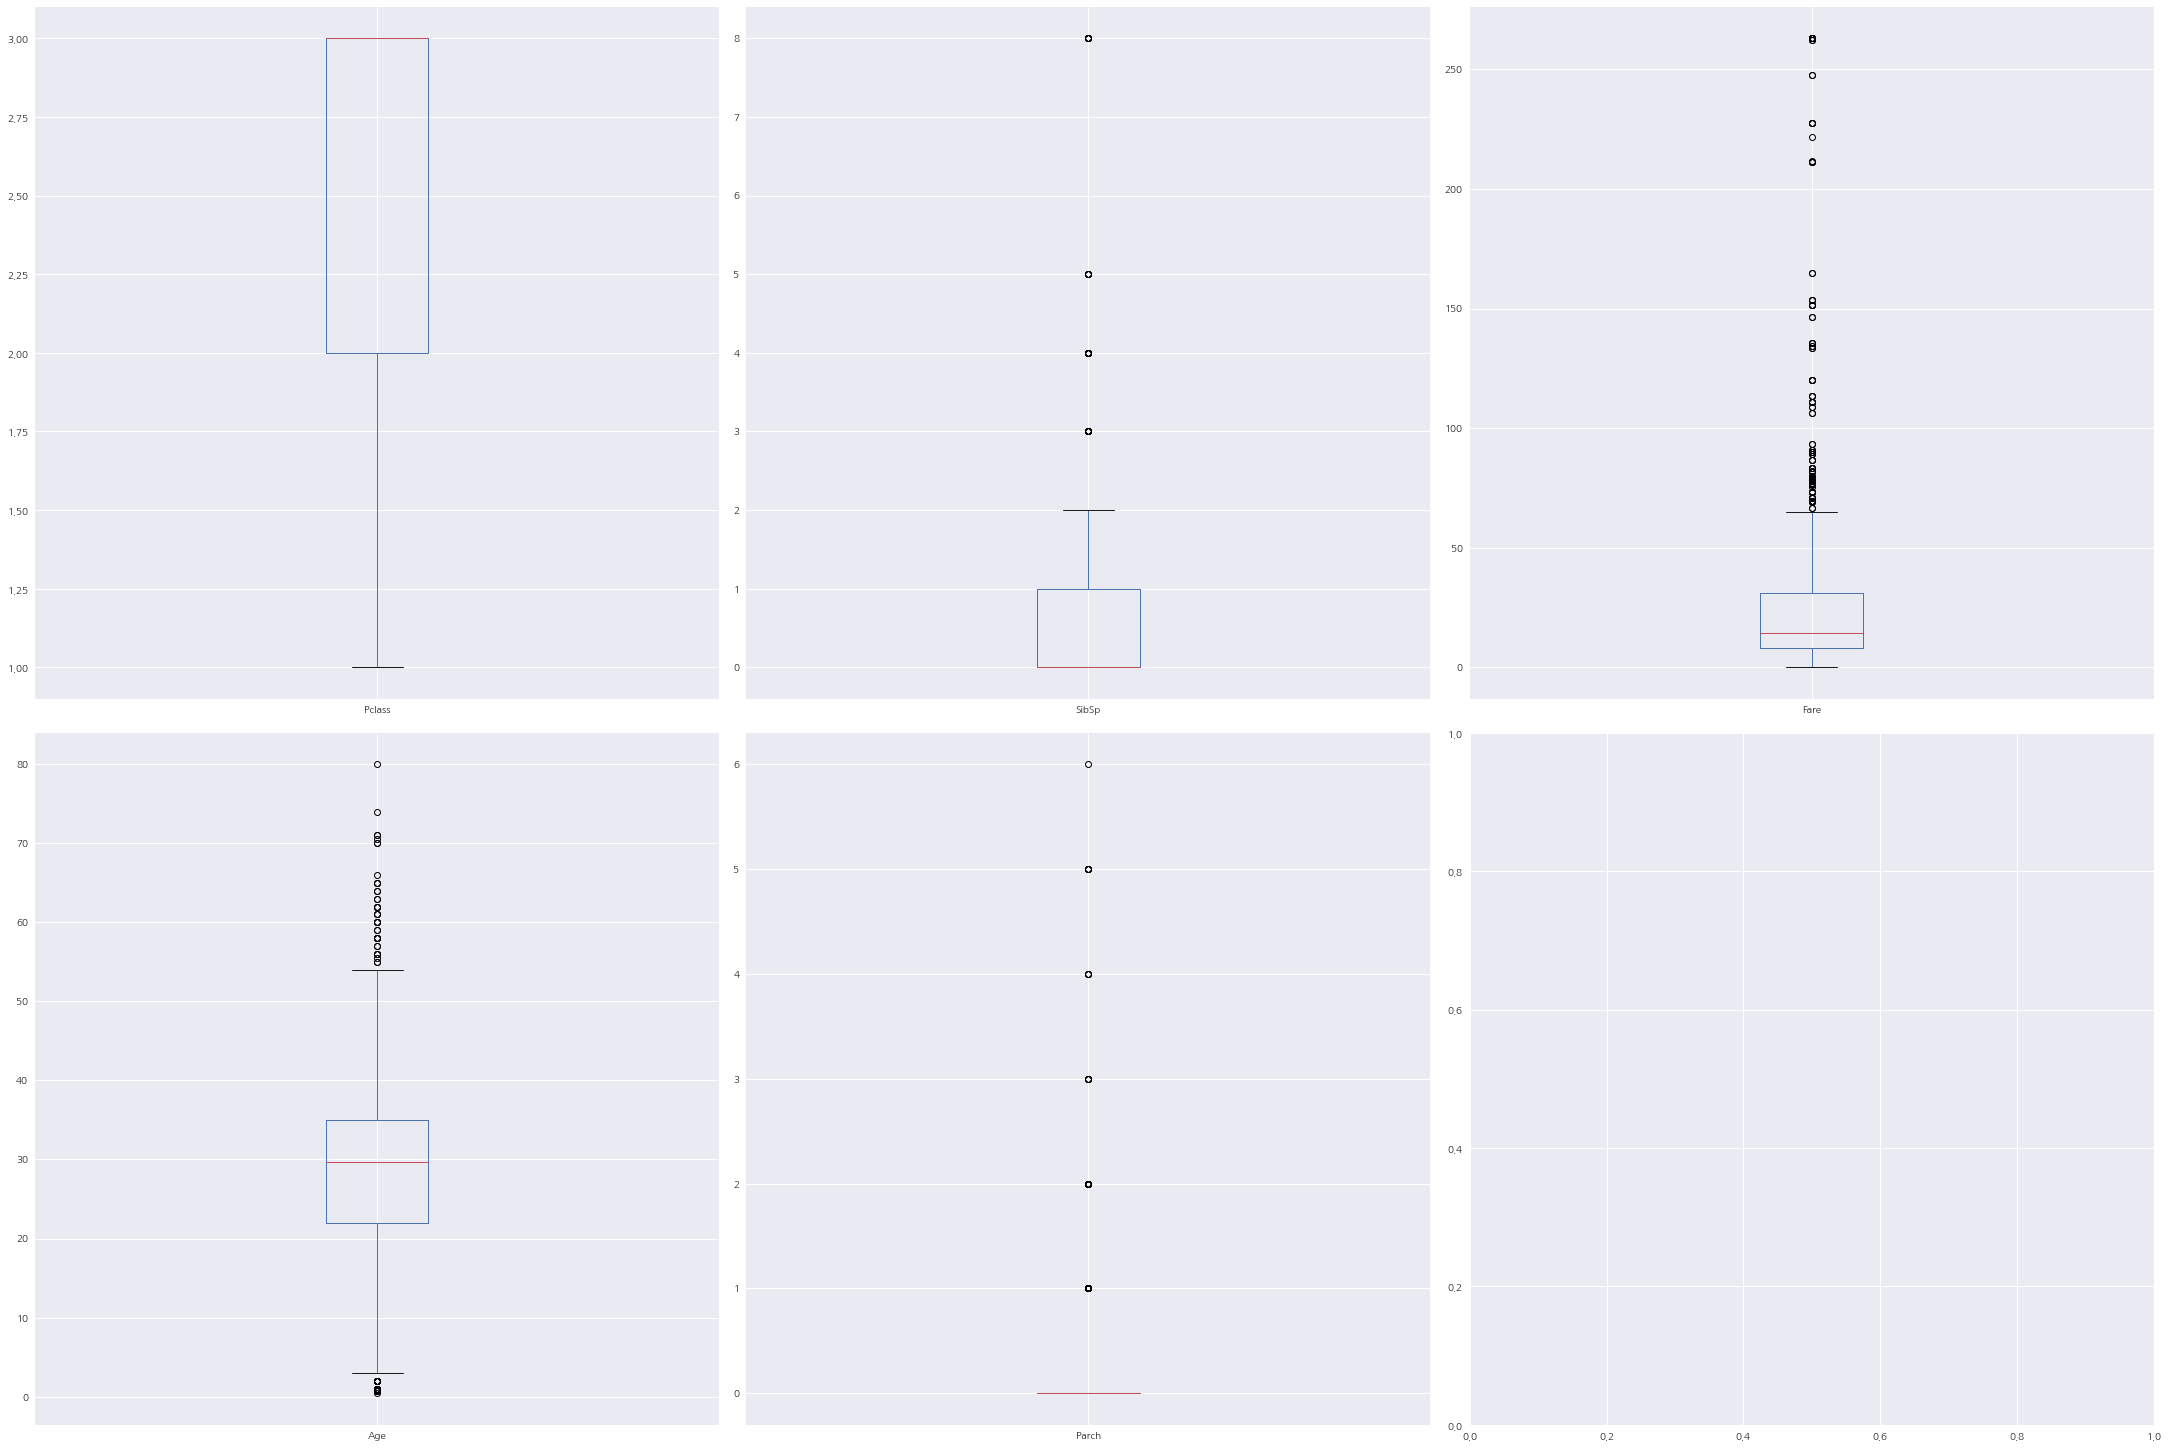

In [37]:
%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "NanumGothic"

ncols = 3
nrows = 2

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((30, 20))

for col, ax in zip(train_num.columns, axs.T.ravel()):
    train_num[[col]].boxplot(ax=ax)
    
plt.show()

---

## 2. Data Quality (데이터 품질) 확인 후 데이터 전처리(Data Cleansing & Pre-Processing)

### 1. 결측치 확인 : pd.Series.isna() / pd.DataFrame.isna().sum()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False
- 데이터프레임 컬럼별 결측치값의 개수를 알고싶으면 pd.DataFrame.isna().sum()

In [22]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2. 결측치를 채우는 방법 : pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.
- 범주형 변수일 경우, 최빈값으로 대체할 수 있습니다.
- train data
    - 결측치가 있는 Age는 age의 평균으로 채워봅시다.
    - 결측치가 있는 Embarked는 빈도수가 가장 많은 값으로 채워봅시다.
- test data
    - 결측치가 있는 Age는 age의 평균으로 채워봅시다.

In [23]:
train['Age'] = train['Age'].fillna(value = train['Age'].mean())

In [24]:
train['Age'].isna().sum()

0

In [32]:
train['Embarked'].mode()[0]

'S'

In [29]:
train['Embarked'].fillna(value = train['Embarked'].mode()[0], inplace = True)

In [30]:
train['Embarked'].isna().sum()

0

3. 무한대값 확인 : np.isinf(abs(pd.series)).sum()
- 무한대는 -무한대 / 무한대 있으므로 절댓값으로 확인
- 컬럼별 무한대 개수는 isinf().sum()

In [33]:
import numpy as np
np.isinf(abs(train['Age'])).sum()

0

4. 이상치(outlier)를 확인
5. 이상치 대체방법
- IQR을 이용한 이상치 대체 방법
    - 25%에 위치한 값을 구해줍니다.
    
    `np.quantile(Series, 0.25)`
    
    - 75%에 위치한 값을 구해줍니다.
    
    `np.quantile(Series, 0.75)`
    
    - IQR을 구해줍니다.
    - quantile_25보다 1.5 * IQR 작은 값을 구해줍니다.
    - quantile_75보다 1.5 * IQR 큰 값을 구해줍니다.
    - minimum보다 크거나 같고, maximum보다 작거나 같은 값들만 뽑아냅니다.

In [34]:
# 25%에 위치한 값을 구해줍니다.
quantile_25 = np.quantile(train['Fare'], 0.25)

# 75%에 위치한 값을 구해줍니다.
quantile_75 = np.quantile(train['Fare'],0.75)

# IQR을 구해줍니다.
IQR = quantile_75 - quantile_25

# quantile_25보다 1.5 * IQR 작은 값을 구해줍니다.
minimum = quantile_25 - 1.5 * IQR

# quantile_75보다 1.5 * IQR 큰 값을 구해줍니다.
maximum = quantile_75 + 1.5 * IQR

# minimum보다 크거나 같고, maximum보다 작거나 같은 값들만 뽑아냅니다.
train2 = train[(minimum <= train['Fare']) & (train['Fare'] <= maximum)]

- winsorizing을 이용한 이상치 대체 방법
    - from scipy.stats.mstats import winsorize
    - train['변수명']= winsorize(train['변수명'], limits=[퍼센트/2, 퍼센트/2])

In [39]:
# boxplot에서 보이는 이상치 처리 -> 1% winsorizing 활용
from scipy.stats.mstats import winsorize
for i in range(len(train_num.columns)):
    train_num.iloc[:,i]= winsorize(train_num.iloc[:,i], limits=[0.005, 0.005])

---

## 3. Variable Relations (변수 상관성)

### a. 상관계수 및 산점도를 통한 다중공선성 확인

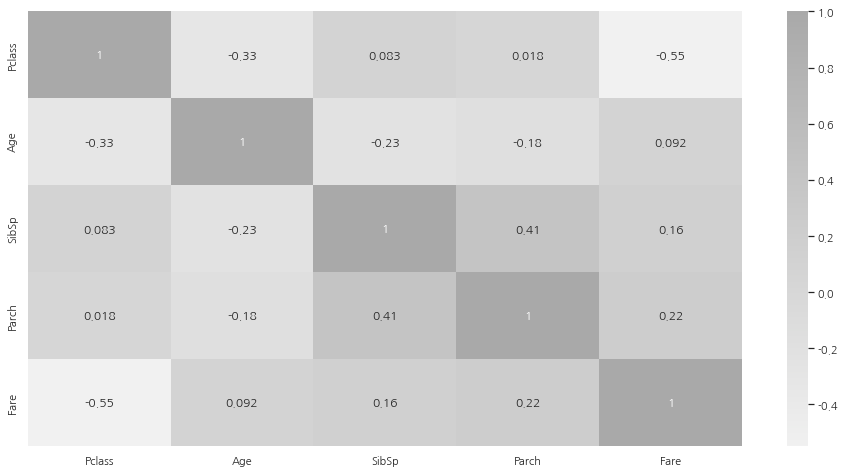

In [61]:
# 1) 독립변수, 종속변수 설정
y = train[['Survived']]
x = train[['Pclass','Age','SibSp','Parch','Fare']]

# 2)상관행렬 보기
x.corr()

# 3) 상관행렬 시각화
cmap = sns.light_palette("darkgray", as_cmap = True)
sns.set(font="NanumGothic",rc = {'figure.figsize':(16,8)})  
sns.heatmap(x.corr(), annot = True, cmap = cmap)
plt.show()

# 4) 변수끼리 산점도를 시각화
# sns.pairplot(x)
# plt.show()


### b. VIF를 통한 다중공선성 확인

In [62]:
# vif 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,3.944568,Age
1,3.704638,Pclass
2,1.667827,Fare
3,1.558133,SibSp
4,1.547177,Parch


---

## 4. 변수 선택
## Feature Engineering
### 1) 로지스틱 회귀 전 정규성 검정, 독립성 검정, 등분산성 검정

a. 정규성 검정

In [ ]:
# 1. x의 모든 변수들의 정규성 검정을 Q-Q plot으로 시각화
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "NanumGothic"

# 코드를 적어주세요

In [42]:
from scipy.stats import shapiro, anderson, kstest, jarque_bera, normaltest

# 2. x의 모든 변수들의 정규성 검정을 shapiro로 통계적 확인(유의수준은 0.05)
# 코드를 적어주세요


# 3. x의 모든 변수들의 정규성 검정을 kstest로 통계적 확인(유의수준은 0.05)은 같이 진행합니다!

# 4. x의 모든 변수들의 정규성 검정을 jarque_bera로 통계적 확인(유의수준은 0.05)은 같이 진행합니다!

# 5. x의 모든 변수들의 정규성 검정을 normaltest로 통계적 확인(유의수준은 0.05)은 같이 진행합니다!

# 6. x의 모든 변수들의 정규성 검정을 anderson 통계적 확인(유의수준은 0.05)은 같이 진행합니다!
                

b. 등분산성 검정
- bartlett(종속변수=1인 데이터프레임[i], 종속변수=0인 데이터프레임[i])
- 유의수준은 0.05로 합니다.

In [69]:
from scipy.stats import bartlett
# Survived ==1일때의 그룹과 Survived ==0일때의 그룹의 x의 변수들이 등분산성인지 아닌지를 검정해봅시다.(bartlett으로 하되 유의수준은 0.05로 합니다.)

# 코드를 적어주세요

독립성 검정<br>
자료 수집 과정에서 random sampling을 했다면 잔차의 독립성은 만족하는 것으로 볼 수 있다.

### 2) 변수 선택 방법 - T-test
- 등분산성일때 T-test
stats.ttest_ind(종속변수=1인 데이터프레임[i], 종속변수=0인 데이터프레임[i], equal_var=True, alternative='two-sided')
- 이분산성일때 T-test
stats.ttest_ind(종속변수=1인 데이터프레임[i], 종속변수=0인 데이터프레임[i], equal_var=False, alternative='two-sided')
- 유의수준은 0.05로 합니다.

In [72]:
# 2) t_test
import scipy.stats as stats
# 코드를 적어주세요

### 3-1) 변수 선택 방법 - Forward selection

### 3-2) 변수 선택 방법 - Backward selection

### 3-3) 변수 선택 방법 - Stepwise

### 4-1) 변수 선택 방법 - Lasso

### 4-2) 변수 선택 방법 - Ridge

### 4-3) 변수 선택 방법 - Elastic Net

---

# 5. Modeling

### sklearn.linear_model.LogisticRegression()
- 로지스틱 회귀 모형
- 0과 1사이의 값을 산출

### sklearn.tree.DecisionTreeClassifier()
- 의사결정 나무 모델

## 6. 모델 학습 및 검증
## Model Tuning & Evaluation

### model.fit()
- 모델 학습

### model.predict()
- 모델 예측

### model.predict_proba()
- 모델 예측

### pd.DataFrame.to_csv()
 - csv파일 저장하는 함수

## 6. 결과 및 결언
## Conclusion & Discussion